# <font color = "red"> Telemedicine Data Science Challenge </font>

<dt>This notebook is divided into 3 parts:</dt>
    <dd><b>1. </b>Exploratory data analysis</dd>
    <dd><b>2. </b>Forecasting model to predict chat demands and nursing staff for the month of July 2017</dd>
    <dd><b>3. </b>Answer to the questions</dd>

## Part 1 - Exploratory Data Analysis

**Importing necessary librairies**

In [820]:
import numpy as np
import pandas as pd
from IPython.display import Image

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

**Import Dataset, columns creation for date**

In [112]:
url = "https://raw.githubusercontent.com/dialoguemd/Alban-De-Le-Rue/master/data/chat_demand.csv?token=AE7CPQGV5NCS2ME2ZBMWHL274KIHK"

chats_demand = pd.read_csv(url, index_col = 0, parse_dates = [0])
chats_demand.head()

,eligible_users,chats
date,,
2017-01-01,10000,61.0
2017-01-02,10000,126.0
2017-01-03,10000,119.0
2017-01-04,10000,118.0
2017-01-05,10000,117.0


In [8]:
# Extract year, month, day

In [115]:
chats_demand["year"] = chat_demands.index.year
chats_demand["month"] = chat_demands.index.month
chats_demand["day"] = chat_demands.index.day

In [72]:
chats_demand.head()

,eligible_users,chats,year,month,day
date,,,,,
2017-01-01,10000,61.0,2017,1,1
2017-01-02,10000,126.0,2017,1,2
2017-01-03,10000,119.0,2017,1,3
2017-01-04,10000,118.0,2017,1,4
2017-01-05,10000,117.0,2017,1,5


### <font color = "blue"> A) - Description of the Data</font>

In [73]:
# Check information on dataset
display(chats_demand.info())
display(chats_demand.shape)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 212 entries, 2017-01-01 to 2017-07-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   eligible_users  212 non-null    int64  
 1   chats           181 non-null    float64
 2   year            212 non-null    int64  
 3   month           212 non-null    int64  
 4   day             212 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 9.9 KB


None

(212, 5)

In [74]:
# Based on the info and data shape, we see that we have potential missing values in the columns [chats]
# To confirm this finding:
sum(chats_demand["chats"].isna())

# We find 31 missing values for chats, which corresponds to the 31 values to be predicted
# Hence, we determine that there are no missing values to be treated.

31

In [75]:
# Years, months and days provided in the dataset:
print("Years: ", chats_demand["year"].unique())

Years:  [2017]


In [76]:
print("Months: ", chats_demand["month"].unique())

Months:  [1 2 3 4 5 6 7]


In [77]:
print("Days: ", chats_demand["day"].unique())

Days:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


The dataset is solely for the year 2017, from January (1) to July (7)

In [154]:
# Description of the 2 original columns of the dataset
chat_demands[["eligible_users", "chats"]].describe()

,eligible_users,chats
count,212.000000,181.000000
mean,26509.433962,270.668508
std,10403.923142,114.015840
min,10000.000000,58.000000
25%,16000.000000,159.000000
50%,30000.000000,281.000000
75%,35000.000000,380.000000
max,42000.000000,440.000000


### <font color = "blue"> B) - Analysis of Data Aggregated by Month</font>
This first part will allow us to determine the general trend of each variable

#### Graph 1: Average number of eligible users per month

In [116]:
avg_eligible_per_month = chats_demand.groupby("month")["eligible_users"].mean()
avg_eligible_per_month

month
1    11677.419355
2    14714.285714
3    20000.000000
4    28800.000000
5    33935.483871
6    35000.000000
7    40645.161290
Name: eligible_users, dtype: float64

In [80]:
# We can rename the months for future labeling
months = ["January", "February", "March", "April", "May", "June", "July"]

In [42]:
# Plot the evolution of average eligible users per month

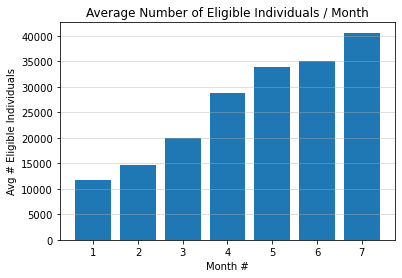

In [120]:
fig, ax = plt.subplots()
ax.bar(avg_eligible_per_month.index, avg_eligible_per_month)
ax.set_xlabel("Month #")
ax.set_ylabel("Avg # Eligible Individuals")
ax.set_title("Average Number of Eligible Individuals / Month")
ax.grid(axis = "y", alpha = 0.5)

#### Graph 2: Average number of chats per month

In [118]:
avg_chats_per_month = chats_demand.groupby("month")["chats"].mean()[:6]
avg_chats_per_month

month
1    122.322581
2    159.250000
3    221.000000
4    324.066667
5    391.935484
6    400.566667
Name: chats, dtype: float64

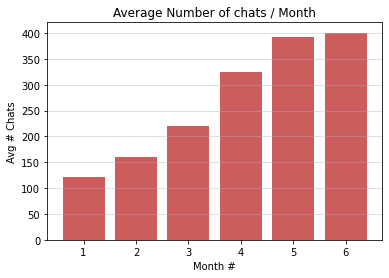

In [119]:
# Changing the color of this graph to differentiate clearly from the above graph
fig, ax = plt.subplots()
ax.bar(avg_chats_per_month.index, avg_chats_per_month, color = "indianred")
ax.set_xlabel("Month #")
ax.set_ylabel("Avg # Chats")
ax.set_title("Average Number of chats / Month")
ax.grid(axis = "y", alpha = 0.5)

#### Graph 3: Average Ratio of # chats / # elligible user per month
This ratio will allow us to visualize on average, how many chats are made per user per month

In [89]:
# Step 1: create a new column containing the calculated ratio

In [121]:
chats_demand["chats_eligible_ratio"] = chats_demand["chats"] / chats_demand["eligible_users"]
chats_demand["chats_eligible_ratio"].head()

date
2017-01-01    0.0061
2017-01-02    0.0126
2017-01-03    0.0119
2017-01-04    0.0118
2017-01-05    0.0117
Name: chats_eligible_ratio, dtype: float64

In [122]:
# Step 2: Compute the average of this ratio per month
avg_chats_eligible_ratio = chats_demand.groupby("month")["chats_eligible_ratio"].mean()[:6]
avg_chats_eligible_ratio

month
1    0.010446
2    0.010791
3    0.011011
4    0.011245
5    0.011551
6    0.011445
Name: chats_eligible_ratio, dtype: float64

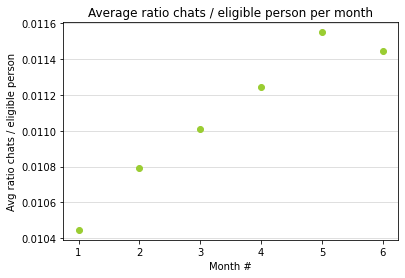

In [124]:
# Step 3: plot the obtained data
# Changing the color of this graph to differentiate clearly from the above graph
fig, ax = plt.subplots()
ax.plot(avg_chats_eligible_ratio.index, avg_chats_eligible_ratio, "o", color = "yellowgreen")
ax.set_xlabel("Month #")
ax.set_ylabel("Avg ratio chats / eligible person")
ax.set_title("Average ratio chats / eligible person per month")
ax.grid(axis = "y", alpha = 0.5)

<dl>
<dt>From these first 3 graphs, we can make the following observations:</dt>
    <dd><b>1. </b>The number of eligible people increased quite fast between January (1) and May (5), stabilised in June (6) and increased rapidly again in July (7).</dd>
    <dd><b>2. </b>The number of chats follows roughly the same pattern as th number of eligible people (up until June).</dd>
    <dd><b>3. </b>The ratio of chats / eligible person increases very little between January and May, and even decreases very slightly in June (relative to May).</dd>
</dl>

To further explore our data on a monthly basis and confirm our observations, we can explore the increase / decrease pattern we've observed in the previous 3 graphs. For recall, here is the augmented dataset up to this point:

In [156]:
chats_demand.head()

,eligible_users,chats,year,month,day,chats_eligible_ratio
date,,,,,,
2017-01-01,10000,61.0,2017,1,1,0.0061
2017-01-02,10000,126.0,2017,1,2,0.0126
2017-01-03,10000,119.0,2017,1,3,0.0119
2017-01-04,10000,118.0,2017,1,4,0.0118
2017-01-05,10000,117.0,2017,1,5,0.0117


In [129]:
# Step 1: create new data series based on the yearly-aggregated data containing only the absolute change
# and the %-change between each rows

In [130]:
# a) For the number of eligible individuals
avg_eligible_per_month_diff = avg_eligible_per_month.diff()
avg_eligible_per_month_diff.dropna(inplace = True)
avg_eligible_per_month_diff

month
2    3036.866359
3    5285.714286
4    8800.000000
5    5135.483871
6    1064.516129
7    5645.161290
Name: eligible_users, dtype: float64

In [151]:
avg_eligible_per_month_pct_change = avg_eligible_per_month.pct_change()
avg_eligible_per_month_pct_change.dropna(inplace = True)
avg_eligible_per_month_pct_change *= 100
avg_eligible_per_month_pct_change

month
2    26.006314
3    35.922330
4    44.000000
5    17.831541
6     3.136882
7    16.129032
Name: eligible_users, dtype: float64

In [139]:
# b) For the number of chats
avg_chats_per_month_diff = avg_chats_per_month.diff()
avg_chats_per_month_diff.dropna(inplace = True)
avg_chats_per_month_diff

month
2     36.927419
3     61.750000
4    103.066667
5     67.868817
6      8.631183
Name: chats, dtype: float64

In [150]:
avg_chats_per_month_pct_change = avg_chats_per_month.pct_change()
avg_chats_per_month_pct_change.dropna(inplace = True)
avg_chats_per_month_pct_change *= 100
avg_chats_per_month_pct_change

month
2    30.188555
3    38.775510
4    46.636501
5    20.942857
6     2.202195
Name: chats, dtype: float64

In [144]:
# b) For the ratio chats / eligible person
avg_chats_eligible_ratio_diff = avg_chats_eligible_ratio.diff()
avg_chats_eligible_ratio_diff.dropna(inplace = True)
avg_chats_eligible_ratio_diff

month
2    0.000345
3    0.000219
4    0.000235
5    0.000305
6   -0.000106
Name: chats_eligible_ratio, dtype: float64

In [153]:
avg_chats_eligible_ratio_pct_change = avg_chats_eligible_ratio.pct_change()
avg_chats_eligible_ratio_pct_change.dropna(inplace = True)
avg_chats_eligible_ratio_pct_change *= 100
avg_chats_eligible_ratio_pct_change

month
2    3.302359
3    2.033129
4    2.129948
5    2.716548
6   -0.916364
Name: chats_eligible_ratio, dtype: float64

In [157]:
# Step 2: we can plot these changes on a graph to better visualize their evolution over each month

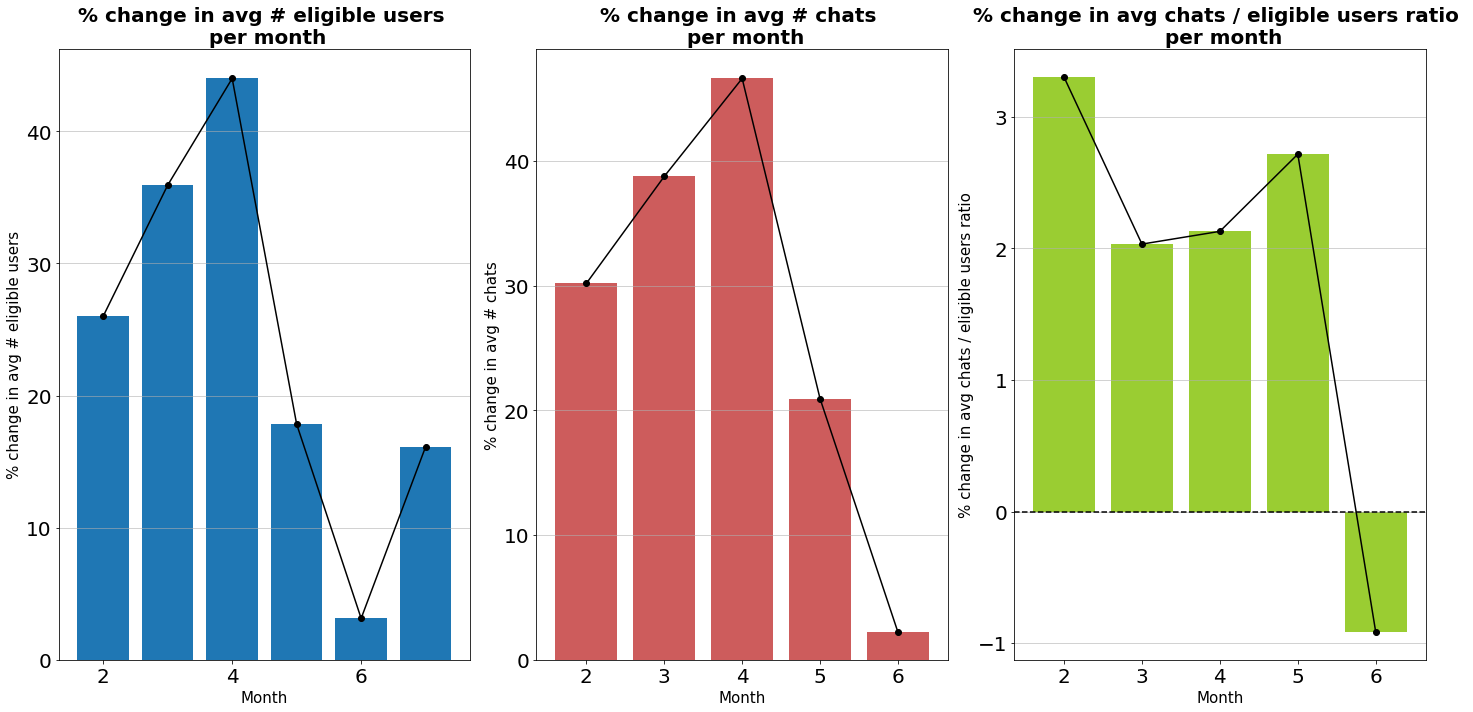

In [843]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

ax1.plot(avg_eligible_per_month_pct_change, marker = "o", color = "black")
ax1.bar(avg_eligible_per_month_pct_change.index, avg_eligible_per_month_pct_change)
ax1.set_xlabel("Month", fontsize = 15)
ax1.set_ylabel("% change in avg # eligible users", fontsize = 15)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax1.set_title("% change in avg # eligible users \n per month", fontweight = "bold", fontsize = 20)
ax1.grid(axis = "y", alpha = 0.7)

ax2.plot(avg_chats_per_month_pct_change, marker = "o", color = "black")
ax2.bar(avg_chats_per_month_pct_change.index, avg_chats_per_month_pct_change, color = "indianred")
ax2.set_xlabel("Month", fontsize = 15)
ax2.set_ylabel("% change in avg # chats", fontsize = 15)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax2.set_title("% change in avg # chats \n per month", fontweight = "bold", fontsize = 20)
ax2.grid(axis = "y", alpha = 0.7)

ax3.plot(avg_chats_eligible_ratio_pct_change, marker = "o", color = "black")
ax3.bar(avg_chats_eligible_ratio_pct_change.index, avg_chats_eligible_ratio_pct_change, color = "yellowgreen")
ax3.axhline(y = 0.0, color='black', linestyle='--')
ax3.set_xlabel("Month", fontsize = 15)
ax3.set_ylabel("% change in avg chats / eligible users ratio", fontsize = 15)
ax3.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax3.set_title("% change in avg chats / eligible users ratio \n per month", fontweight = "bold", fontsize = 20)
ax3.grid(axis = "y", alpha = 0.7)

plt.tight_layout()

<dl>
    <div style="text-align: justify">
<dt>From these 3 graphs, we can make the following observations:</dt>
    <p><dd><b>1.</b> We can see that the number of eligible people sees its increase accelerate between January and April, but decelerate from April to June. In June, the %-change is very small (+3.13%), a severe drop compared to May (+17.83%) and April (+44.00%). The %-change then accelerates again between June and July. From this graph, we can also conclude that the average number of eligible people per month was growing quite fast (with the exception of June) and constantly between January and July 2017. </dd></p>
<p><dd><b>2.</b> The %-change for the number of chats follows the same pattern roughly than for the %-change in eligible individuals throughout the months of January to June (We do not have the data for July at this point.). Something to note: while the same pattern is observed relative to the previous graph, we see slightly higher values for each months with the exception of June, where the % change in chats is slighly smaller than the %-change in eligible individuals. These differences are highlighted in the 3rd graph. We can also see that, like the previous graph, the average number of chats per month was growing fast (with the exception of June) and constantly between January and June 2017.</dd></p>
    <p><dd><b>3. </b>The %-change for the ratio of chats / eligible individual saw its largest increase between January and February before falling in March and regain some speed until May. However, we see that the ratio decreases by almost 1% in June relative to May. This means that between May and June, the average number of eligible individuals increased faster than the average number of chats.</dd></p>
    </div>
</dl>

### <font color = "blue"> C) - Drilling down the data on a daily basis</font>
We can explore these 3 variables on a daily basis to get a closer look of the data, focusing on each month, to see if a trend emerges (what day(s) of the month these variables are at their min/max, increase/decrease the fastest, etc.) 

In [242]:
# Our first step will be to visualize the 3 variables used previously 
# throughout the whole given period to get an overview of the situation

#### Graph 4: Number of eligible individuals over time

In [839]:
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator(bymonthday = 15)  # every 14 days from the start of the month

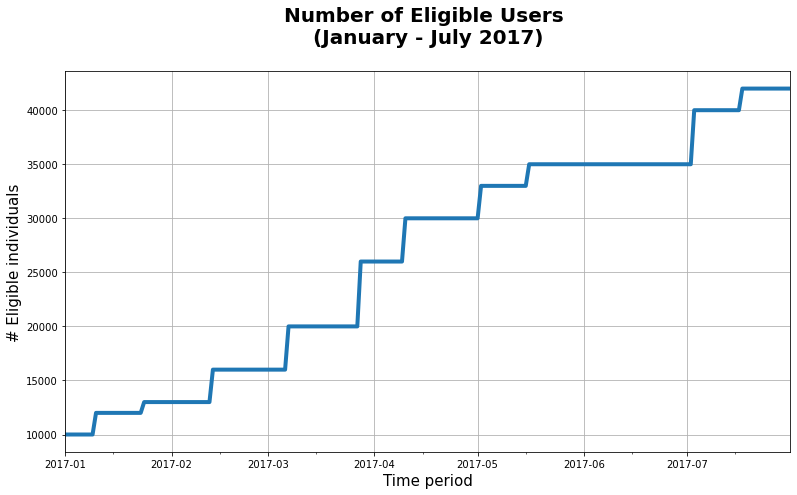

In [840]:
fig, ax = plt.subplots(figsize = (13, 7))

ax.plot(chats_demand.index, chats_demand["eligible_users"], lw = 4)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)

ax.set_xlim(chats_demand.index.min(), chats_demand.index.max())
ax.set_xlabel("Time period", fontsize = 15)
ax.set_ylabel("# Eligible individuals", fontsize = 15)
ax.set_title("Number of Eligible Users \n (January - July 2017) \n", fontsize = 20, fontweight = "bold")
ax.grid()

<div style="text-align: justify">We see from this first graph that, like we saw previously when analyzing the average number of eligible users per month, this variable only increases over time between January 1st and July 31st 2017. In addition, we can see some changes occuring during each month. For example, in January, we can observe that the number of eligible users increased twice. However, there was no changes observed between ~May 15 and ~July 2, a period of roughly 1 month 1/2, before increasing again (as seen earlier).</div>

#### Graph 5: Number of chats over time

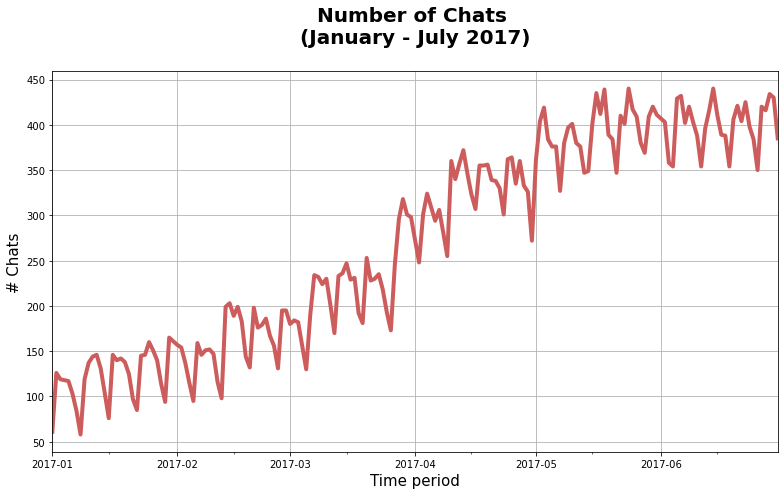

In [356]:
fig, ax = plt.subplots(figsize = (13, 7))

ax.plot(chats_demand.index, chats_demand["chats"], lw = 4, color = "indianred")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)

ax.set_xlim(chats_demand.index.min(), chats_demand[chats_demand["month"] == 6].index.max())
ax.set_xlabel("Time period", fontsize = 15)
ax.set_ylabel("# Chats", fontsize = 15)
ax.set_title("Number of Chats \n (January - July 2017) \n", fontsize = 20, fontweight = "bold")
ax.grid()

<div style="text-align: justify">We can see on this graph that the number of chats overall increases steadily from January 1st until ~May 15 before stabilizing. The variable however fluctuates a lot throughout the time period, and it will be interesting to see within each month where these fluctuations occur, and if a seasonality can be determined.</div>

We can also examine the relationship between the variables chat and eligible users:

#### Graph 6: Elligible Users & Chats Over Time

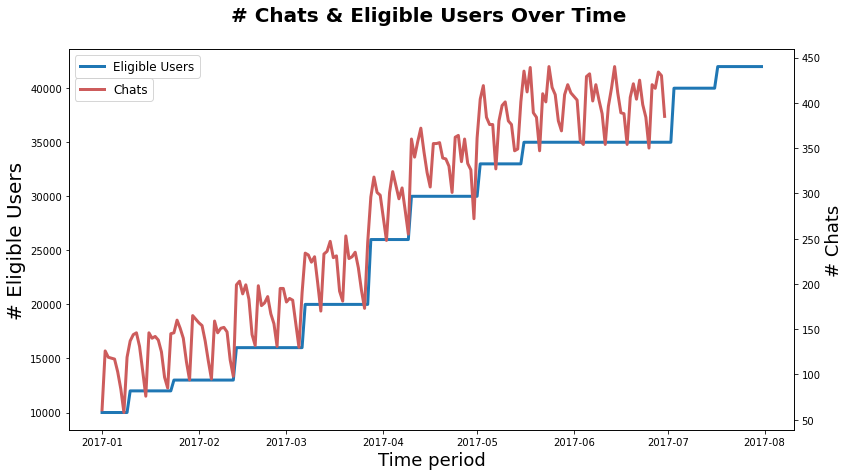

In [736]:
fig, (ax1) = plt.subplots(figsize = (13, 7))
ax1.plot(chat_demands["eligible_users"], label = "Eligible Users", lw = 3)
ax1.set_xlabel("Time period", fontsize = 18)
ax1.set_ylabel("# Eligible Users", fontsize = 20)
ax1.set_title("# Chats & Eligible Users Over Time \n", fontweight = "bold", fontsize = 20)

ax2 = ax1.twinx()

ax2.plot(chat_demands["chats"], color = "indianred", label = "Chats", lw = 3)
ax2.set_ylabel("# Chats", fontsize = 18)

ax1.legend(fontsize = "large")
ax2.legend(loc = 2, bbox_to_anchor=(0., 0.1, 0.1, 0.84), fontsize = "large")

<div style="text-align: justify">From this graph, we can clearly see that both values increase overtime at the same time, meaning that wheneber the number of eligible users increase, the demand in chats increases approximately at the same pace. This means that both variable could be highly correlated. To compute this correlation, we would use Spearman's rank correlation coefficient since one of our variable, Eligible Users, is discrete, meaning we cannot use the Pearson correlation which requires both variables to be continuous.</div>

In [753]:
print("Correlation coefficient between Chats & Eligible Users: ", round(chats_demand.corr(method = "spearman").iloc[0, 1], 2))

Correlation coefficient between Chats & Eligible Users:  0.96


This correlation is extremely high, which actually simply confirms what we have seen in a visual manner in the previous graph.

#### Graph 7: Ratio of chats / eligible users over time

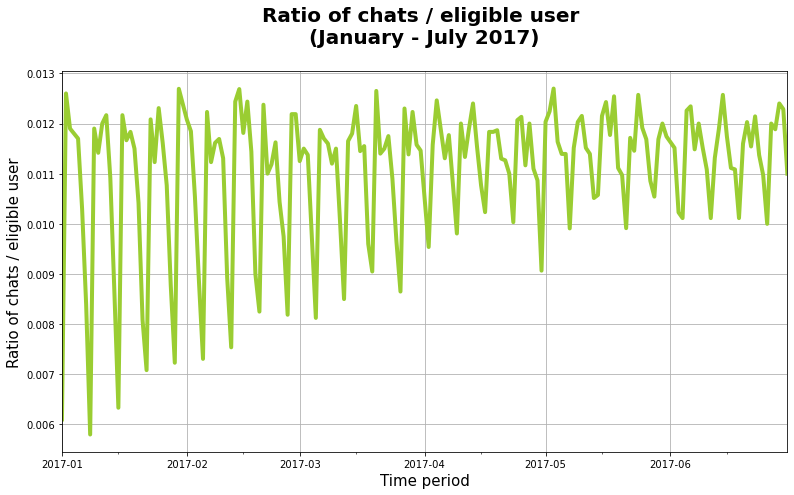

In [357]:
fig, ax = plt.subplots(figsize = (13, 7))

ax.plot(chats_demand.index, chats_demand["chats_eligible_ratio"], lw = 4, color = "yellowgreen")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)

ax.set_xlim(chats_demand.index.min(), chats_demand[chats_demand["month"] == 6].index.max())
ax.set_xlabel("Time period", fontsize = 15)
ax.set_ylabel("Ratio of chats / eligible user", fontsize = 15)
ax.set_title("Ratio of chats / eligible user \n (January - July 2017) \n", fontsize = 20, fontweight = "bold")
ax.grid()

<div style="text-align: justify">This graph shows that the ratio of chats / eligible user does not seem to increase or decrese overall overtime, hence why it was necessary to observe the average per month to see if a trend emerged. However, it does show that this ratio varies greatly from January 1st to approximately April 1st before stabilizing. An analysis on a monthly basis will be necessary to get a clearer picture.</div>

#### Analysis of chats & chats / eligible user ratio
(Since the overall picture of eligible users is clear enough and shows well how this variable evolves over time, we do not need to create graphs for each month for it)

In [385]:
# Step 1: We create a new column identifying the day of the week in order to better understand the pattern
# within each month
chats_demand["weekday"] = chats_demand.index.day_name()
chats_demand.head()

,eligible_users,chats,year,month,day,chats_eligible_ratio,weekday
date,,,,,,,
2017-01-01,10000,61.0,2017,1,1,0.0061,Sunday
2017-01-02,10000,126.0,2017,1,2,0.0126,Monday
2017-01-03,10000,119.0,2017,1,3,0.0119,Tuesday
2017-01-04,10000,118.0,2017,1,4,0.0118,Wednesday
2017-01-05,10000,117.0,2017,1,5,0.0117,Thursday


In [386]:
# Step 2: We create 7 datasets (one for each month)
def get_data(df, month):
    """
    Function to extract the data by month from the global dataframe
    
    Parameters:
    ----------
    df: a pandas DataFrame
    month: int
           The integer value associated with each month (January = 1, December = 12)
    """
    df_month = df.loc[df["month"] == month]
    return df_month

In [387]:
months = ["january", "february", "march", "april", "may", "june", "july"]

In [388]:
# We create a dictionary of dataframes. Order is not important.
df_dict = {}
for ind, month in enumerate(months, start = 1):
    df_dict["chats_demand_" + month] = get_data(chats_demand, ind)

In [389]:
# We verify that it gives us the desired output
display(df_dict["chats_demand_january"].head())
display(df_dict["chats_demand_january"].shape)

# We obtain a dataframe containing 31 rows for the month of january, which is accurate

,eligible_users,chats,year,month,day,chats_eligible_ratio,weekday
date,,,,,,,
2017-01-01,10000,61.0,2017,1,1,0.0061,Sunday
2017-01-02,10000,126.0,2017,1,2,0.0126,Monday
2017-01-03,10000,119.0,2017,1,3,0.0119,Tuesday
2017-01-04,10000,118.0,2017,1,4,0.0118,Wednesday
2017-01-05,10000,117.0,2017,1,5,0.0117,Thursday


(31, 7)

In [827]:
# Step 3: We plot each variable for some chosen months
def plot_data(df, column, month, color):
    """
    Function to plot the graph of a given column for the chats_demand dataframe
    
    Parameter:
    ----------
    df: pandas DataFrame
    column: str
            A string indicating which column of the dataframe to analyze
    month: str
           A string indicating which month we want the graph to analyze
    color: string
           A string indicating in which color we wish to plot our data
    """
    
    if column == "chats_eligible_ratio":
        column_name = "Chats / Eligible User Ratio"
    else:
        column_name = column
    
    fig, ax = plt.subplots(figsize = (13, 7))
    
    ax.plot(df.index, df[column], lw = 2, marker = "o", markerfacecolor = "black", color = color)
    ax.set_xlim(df.index.min(), df.index.max())
    ax.xaxis.set_major_locator(mdates.DayLocator(interval = 2)) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %a'))
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval = 1))
    
    ax.set_xlabel("Time period (Days)", fontsize = 15)
    ax.set_ylabel(column_name.title(), fontsize = 15)
    ax.set_title("\n" + column_name.title() + " for the Month of \n" + month.capitalize() + "\n", 
                 fontsize = 20, 
                 fontweight = "bold")
    ax.grid()

#### Graph 8: Number of chats for the month of January

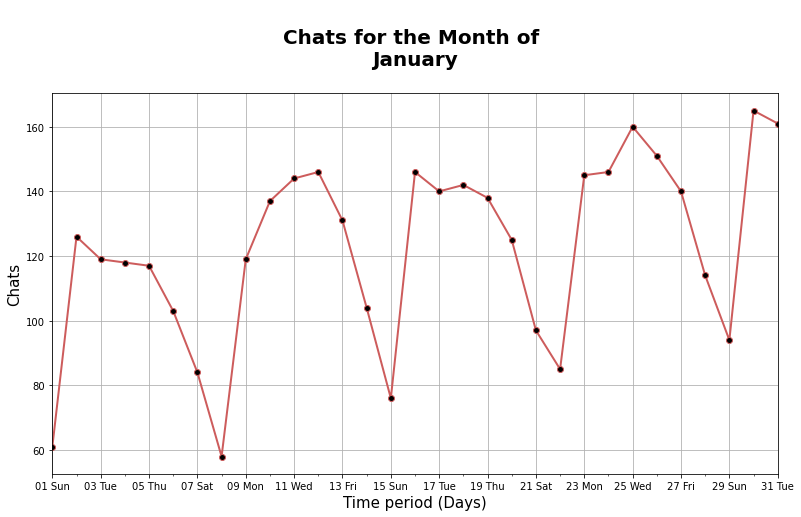

In [828]:
plot_data(df_dict["chats_demand_january"], "chats", "january", "indianred")

<div style="text-align: justify">Focusing on the first month of the year, a clear pattern emerges on a weekly basis. Indeed, we can see that the demand in chats is at its lowest on Sundays and at its peak for the period going from Mondays to Thursdays, before declining on Fridays and Saturdays and reaching once again its lowest point on Sundays. Let's see if the same pattern emerges if we plot the months of March and June (last month with available data):</div>

#### Graph 9: Number of chats for the month of March

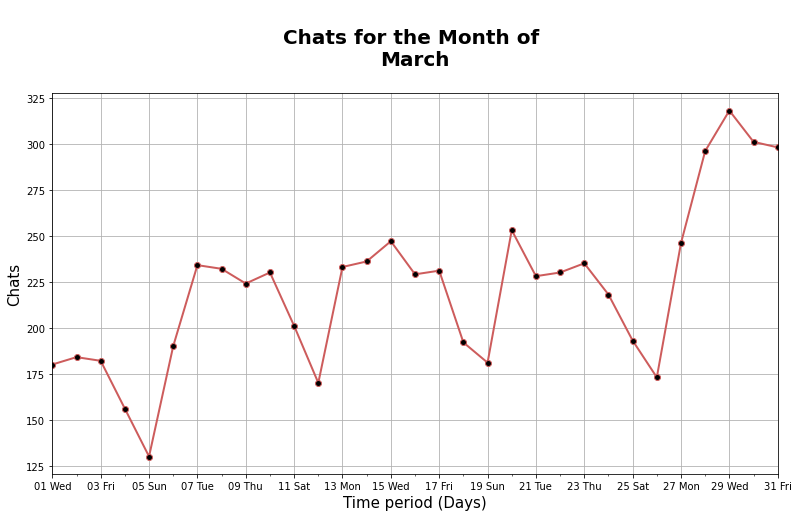

In [829]:
plot_data(df_dict["chats_demand_march"], "chats", "march", "indianred")

<div style="text-align: justify">We see the same pattern as observed for January: Sundays are the days with the least demand in chats, Mondays through Thursdays are the busiest and Fridays and Saturdays represent the decline in demand. Our last graph for chats (June) will help us determine if this pattern is present throughout our dataset.</div>

#### Graph 10: Number of chats for the month of June

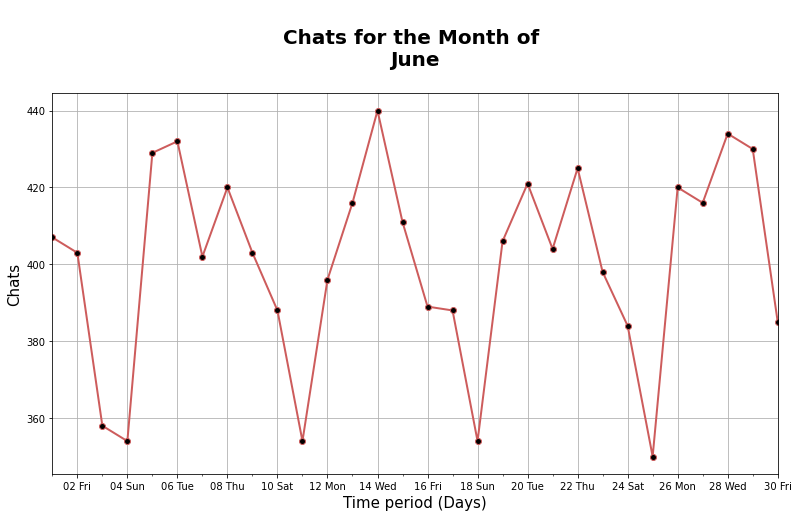

In [830]:
plot_data(df_dict["chats_demand_june"], "chats", "june", "indianred")

Once again, we see a similar pattern emerging, with Sundays being the days witht the least demand while Mondays through Thursdays are the busiest. We however see that there is a lot more fluctuation between Mondays and Thursdays relative to January and March.

We can now analyze the patterns regarding the number chats / eligible user for the months of January, March and June:

#### Graph 11: Chats / Eligible User for the month of January

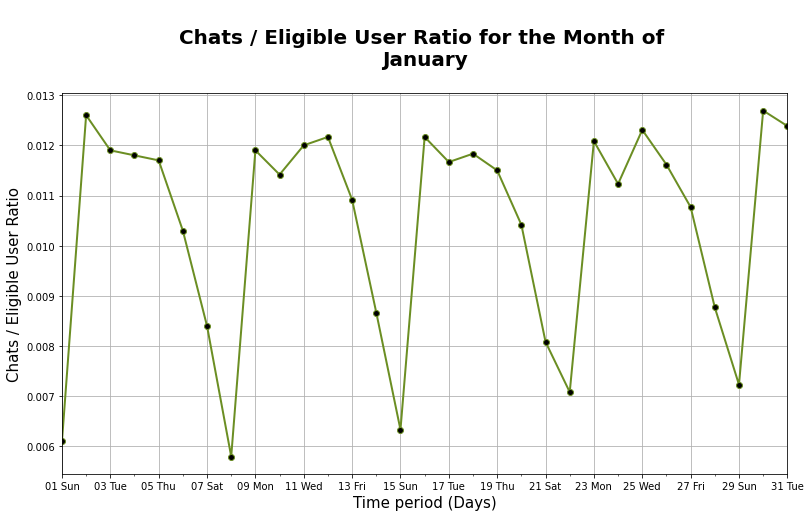

In [831]:
plot_data(df_dict["chats_demand_january"], "chats_eligible_ratio", "january", "olivedrab")

This first graph of the ratio of chats / eligible user for the month of January shows the same clear weekly pattern seen previously, which is expected.

#### Graph 12: Chats / Eligible User for the month of March

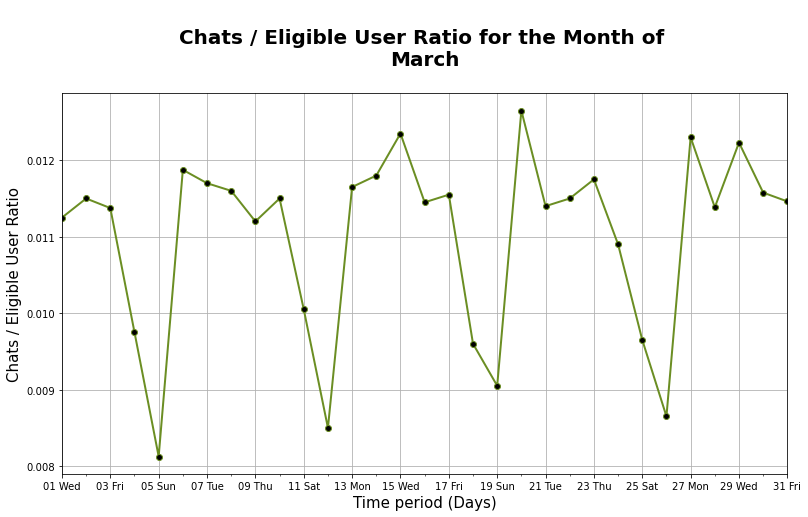

In [832]:
plot_data(df_dict["chats_demand_march"], "chats_eligible_ratio", "march", "olivedrab")

We once again see the same weekly pattern for the month of March

#### Graph 13: Chats / Eligible User for the month of June

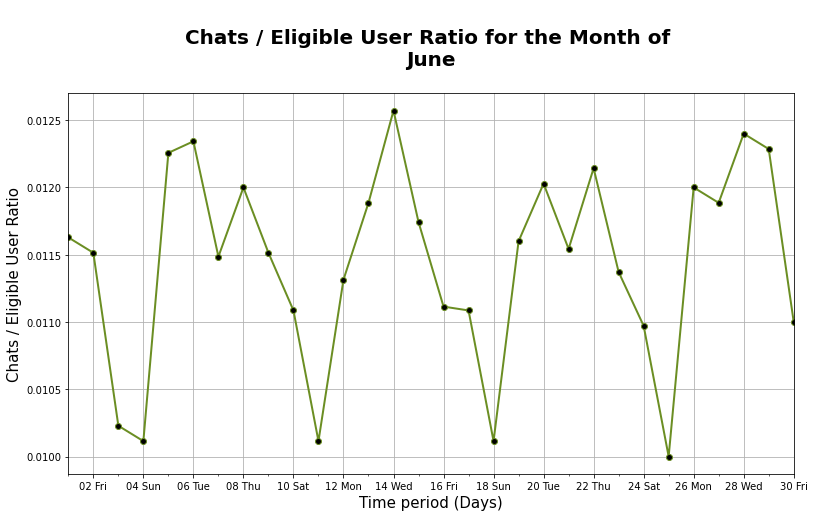

In [833]:
plot_data(df_dict["chats_demand_june"], "chats_eligible_ratio", "june", "olivedrab")

And lastly, the month of June comes to confirm our assomptions regarding the weekly cycle of our ratio.

<div style="text-align: justify">**Note to conclude**: It is easy to see that this ratio follows exacly the same pattern than the number of chats. The explanation for this is super simple: since it is a ratio computed using the chats demand in the numerator, it will logically follow exacly the same pattern. We plotted it to demonstrate this fact and validate the data / make sure we didn't do any mistakes as good practice.</div>

## Part 2 - Forecasting the Demand in Chats &Nursing Staff

**Importing the necessary libraries**

In [547]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import subprocess
import sys
import os

In [650]:
# We would like to import the pmdarima package which does not come with base Python or the Anaconda Distribution.
# The following code installs the package

# Uncomment the next line to execute the installation
# !pip install pmdarima

In [553]:
import pmdarima as pm

In [530]:
# Our first will be to create a Series containing only the chats column with the month of July removed 
chats = chats_demand["chats"].dropna()
chats.head()

date
2017-01-01     61.0
2017-01-02    126.0
2017-01-03    119.0
2017-01-04    118.0
2017-01-05    117.0
Name: chats, dtype: float64

In [639]:
# We identify how many data points we get
print("Number of data points:", chats.shape[0])

Number of data points: 181


As seen in the data exploration part, we saw that for the variable "chats", there was a clear positive trend as well as a weekly seasonality. To confirm these findings, we can decompose the serie into a trend, a seasonality and the residuals.

In [649]:
# We decompose the chats serie using a seasonal period of 7 days (1 week)
decomp_results = seasonal_decompose(chats, period = 7)

If the seasonal period was unknown, we could have used the auto-correlation function (ACF) on the chats serie to identify the periodic correlation pattern. To do this, the following steps are made:

In [660]:
# We make the serie stationary by detrending it using the rolling average as such:
chats_rolling = chats - chats.rolling(7).mean()
chats_rolling = chats_rolling.dropna()

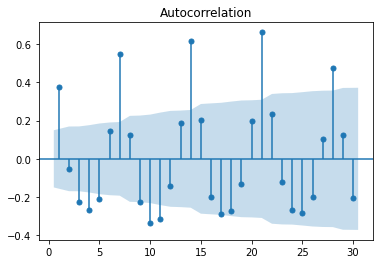

In [659]:
# The rolling series is then plotted using the ACF
plot_acf(chats_rolling, lags = 30, zero = False);

Here, we can identify a seasonal period of 7 steps, confirming our assomption regarding the seasonality of our data.

To continue our analysis, we can decompose the chats Serie into 3 plots: the trend, the seasonality and the residuals using our decomp_results object obtained above:

Text(0.5, 0, 'Time period')

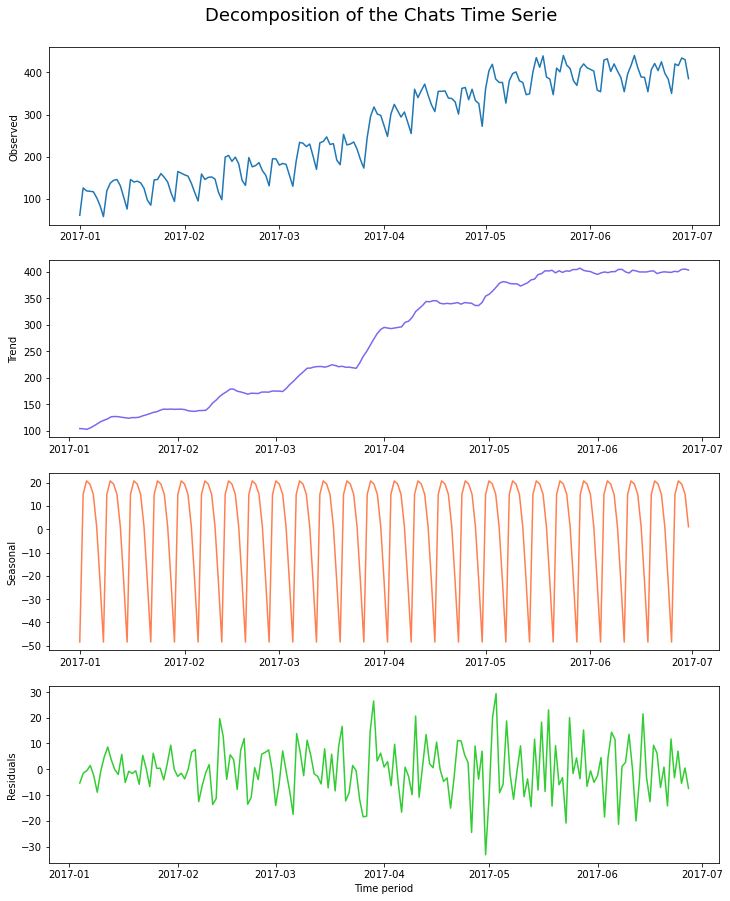

In [668]:
fig, axes = plt.subplots(ncols = 1, nrows = 4, figsize = (12,15))

axes[0].plot(decomp_results.observed)
axes[0].set_ylabel("Observed")
axes[0].set_title("Decomposition of the Chats Time Serie \n", fontsize = 18)

axes[1].plot(decomp_results.trend, color = "mediumslateblue")
axes[1].set_ylabel("Trend")

axes[2].plot(decomp_results.seasonal, color = "coral")
axes[2].set_ylabel("Seasonal")

axes[3].plot(decomp_results.resid, color = "limegreen")
axes[3].set_ylabel("Residuals")
axes[3].set_xlabel("Time period")

<dt>From these graphs, we can make the following observations:</dt>
    <dd><b>1. </b>The trend graph demontrates a clear positive trend of our data from January to June.</dd>
    <dd><b>2. </b>The seasonality graph demontrates a clear seasonal trend that appears to be weekly in our data from January to June.</dd>
    Therefore, our time serie = trend + seasonal + residuals

## Model Selection

This data is a time serie with a weekly seasonal component. Therefore the appropriate model to use in order to forecast the demand in chats for the month of July would a SARIMA one (Seasonal Autoregressive Integrated Moving Average). This type of model is represented under the form:

$SARIMA(p, d, q)(P, D, Q)_S$ with:  
***
<dt>Non-seasonal orders:</dt>
    <dd><b>p: </b>Auto-Regressive order</dd>
    <dd><b>d: </b>Differencing order</dd>
    <dd><b>q: </b>Moving Average order</dd>
***
<dt>Non-seasonal orders:</dt>
    <dd><b>P: </b>Seasonal Auto-Regressive order</dd>
    <dd><b>Q: </b>Seasonal Differencing order</dd>
    <dd><b>D: </b>Seasonal Moving Average order</dd>

<div style="text-align: justify">In order to create this model, we need to find the optimal values for each of these 6 orders. Here, d and D are used to make the serie stationary which is a necessary step before fitting a SARIMA model. d will calculate the difference between each consecutive rows, while D calculates the difference between rows that are one time period apart (for example, 7 days). If D is set to 1 for example and the time period of the seasonality is 7 days, the 1st data point will be substracted from the 8th, the 2nd from the 9th, etc. Since we have a seasonal trend, we can set both d and D to 1. There are two ways of finding the other orders: <b>Manually</b> and <b>Automatically</b>.</div>

### <i><font color = "mediumblue"> Method 1: Manually </font></i>

To determine the coefficient manually, we need to use the ACF and PACF plots.

In [669]:
# Step 1: finding p & q using the ACF and PACF of the difference time series (which makes the serie stationary)

In [679]:
chats_diff = chats.diff().diff(7) # Taking the first difference and seasonal difference of the time serie
chats_diff.dropna(inplace = True) # We remove the first rown containing NaN

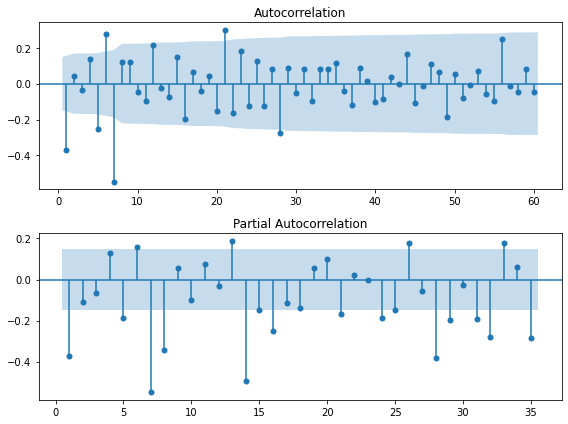

In [731]:
# Plotting the results of the acf and pacf for chats_diff
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(chats_diff, lags = 60, zero = False, ax = ax1);

# Plot the PACF on ax2
plot_pacf(chats_diff, lags = 35, zero = False, ax = ax2);

plt.tight_layout()

<br>To find the best values of p an q, we can apply the following rules:
***
<dt>$AR(p)$</dt>
    <dd><b>ACF: </b>Tails off</dd>
    <dd><b>PACF: </b>Cuts-off after lag p</dd>
***
<dt>$MA(q)$:</dt>
    <dd><b>ACF: </b>Cuts-off after lag q</dd>
    <dd><b>PACF: </b>Tails off</dd>
***
<dt>$ARMA(p, q)$:</dt>
    <dd><b>ACF: </b>Tails off</dd>
    <dd><b>PACF: </b>Tails off</dd>

<div style="text-align: justify">In this case, both the ACF and PACF seem to slowly tail off, meaning we are dealing with an ARMA(p, q) model for the non-seasonal part. We can apply the same logic to find the order values for the seasonal part of our model, using once again the ACF and PCAF, this time using lags at the same interval as our identified seasonality (7):</div>

In [696]:
# Step 2: finding P & Q using the ACF and PACF of the difference time series (which makes the serie stationary)

In [697]:
# Initiate a list of lags we want to check
lags = list(range(7, 49, 7))
lags

[7, 14, 21, 28, 35, 42]

C:\Users\albdl\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


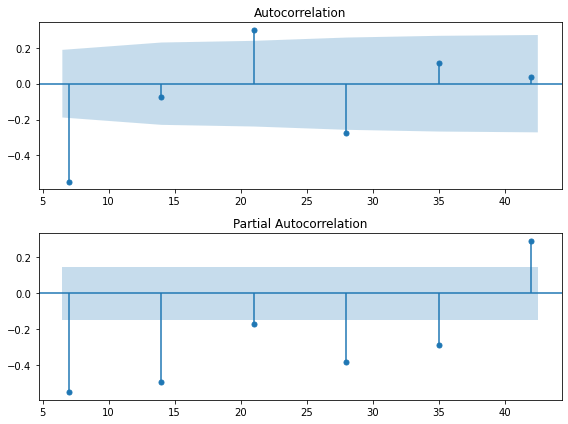

In [730]:
# Plotting the results of the acf and pacf for chats_diff

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(chats_diff, lags = lags, zero = False, ax = ax1);

# Plot the PACF on ax2
plot_pacf(chats_diff, lags = lags, zero = False, ax = ax2);
plt.tight_layout()

<div style="text-align: justify"> Once again, the PAF is visibly tailing of. The picture is a bit more complex for the PCAF but so far, nothing indicates that it cuts off at a certain value and appears to slowly tail off as well. We can therefore assume we are facing an ARMA(PQ) for the seasonal part of our model. To find the best parameter manually in this case, we would have to set a range of of orders for p, q, P & Q and loop over each value, evaluate the model using each possible combination and determine which is best. Manually this would take the form of several embedded for-loops (4 in this case, one for each parameter to find). Thankfully, we can use an already created module, auto_arima from the pmdarima package (see the import calls at the beginning of this section). </div>

### <i><font color = "mediumblue"> Method 2: Automatically </font></i>

This is the method we will use as it greatly simplifies the search for the optimal values of p, q, P & D. For reminder, d and D are already set to 1 as we have a seasonality in our model (D, which offsets the data by the length of the cycle, 7). But first, we need to separate our data into training and testing data, allowing us to see how well the selected model performed.

In [705]:
# Splitting the data using the month of June as Test and January to May as Training
chats_train = chats.loc[:"2017-05-31"]
print(chats_train.head())
print("\n Number of rows in train_data:", chats_train.shape[0])

date
2017-01-01     61.0
2017-01-02    126.0
2017-01-03    119.0
2017-01-04    118.0
2017-01-05    117.0
Name: chats, dtype: float64

 Number of rows in train_data: 151


In [704]:
chats_test = chats.loc["2017-06-01":]
print(chats_test.head())
print("\n Number of rows in test data:", chats_test.shape[0])

date
2017-06-01    407.0
2017-06-02    403.0
2017-06-03    358.0
2017-06-04    354.0
2017-06-05    429.0
Name: chats, dtype: float64

 Number of rows in test data: 30


In [706]:
# We select our optimal orders for the seasonal and non-seasonal part of the serie using auto_arima from pmdarima

In [707]:
# In this model, we use the AIC as information criterion to determine the best model. Since BIC penalizes more than AIC,
# it could select a simpler model. Since our goal is to make a prediction, a model selected by the AIC criterion
# will ensure a greater predictive capacity due to its (potential) increased complexity vis-à-vis the BIC

model1 = pm.auto_arima(chats_train,
                       d = 1,                         # Non-seasonal difference order
                       start_p = 0,                   # Initial guess for p
                       max_p = 4,                     # Max value of p to test
                       trend='c',
                       start_q = 0,                   # Initial guess for q
                       max_q = 4,                     # Max value of 1 to test
                       seasonal = True,               # If the data is seasonal
                       m = 7,                         # Length of the seasonal cycle (7 days)
                       D = 1,                         # Seasonal difference order
                       start_P = 0,                   # Initial guess for P
                       start_Q = 0,                   # Initial guess for Q
                       max_P = 4,                     # Max value of P to test
                       max_Q = 4,                     # Max value of Q to test
                       information_criterion = "aic", # Used to select the best model
                       trace = True,                  # Prints the results as it trains
                       error_action = "ignore",       # Ignores models that throw errors
                       stepwise = True)               # Apply stepwise order search  

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1315.962, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1244.950, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=1296.879, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=1210.715, Time=0.27 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=1209.651, Time=0.48 sec
 ARIMA(1,1,0)(4,1,0)[7]             : AIC=1197.179, Time=0.66 sec
 ARIMA(1,1,0)(4,1,1)[7]             : AIC=1194.685, Time=0.93 sec
 ARIMA(1,1,0)(3,1,1)[7]             : AIC=1195.116, Time=0.50 sec
 ARIMA(1,1,0)(4,1,2)[7]             : AIC=1195.458, Time=1.74 sec
 ARIMA(1,1,0)(3,1,2)[7]             : AIC=1194.480, Time=0.92 sec
 ARIMA(1,1,0)(2,1,2)[7]             : AIC=1193.048, Time=0.63 sec
 ARIMA(1,1,0)(1,1,2)[7]             : AIC=1195.918, Time=0.36 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=1194.875, Time=0.55 sec
 ARIMA(1,1,0)(2,1,3)[7]             : 

The best model obtained is $SARIMA(2, 1, 0)(2, 1, 2)_S$, which we will then use on our entire dataset to make the forecast for the month of July

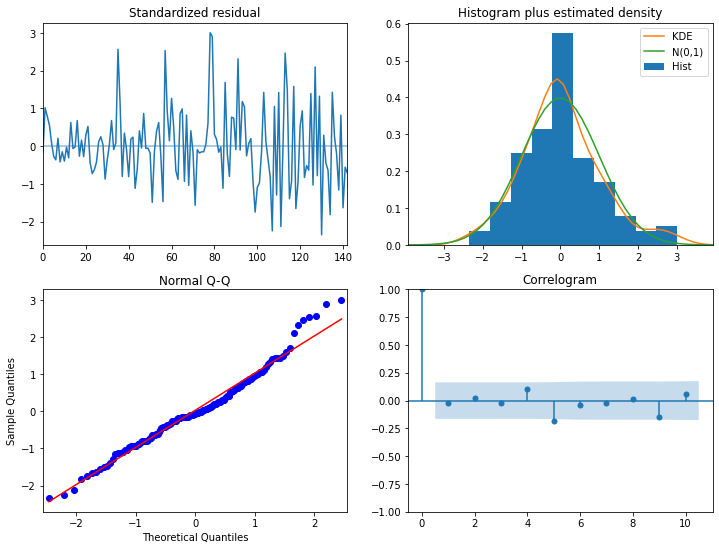

In [735]:
# We can plot the diagnostics obtained from our fitted model:
model1.plot_diagnostics(figsize = (12, 9));

<dl>
<dt>From these 4 graphs, we can make the following observations:</dt>
<div style="text-align: justify"> <p><dd>1) <u>Normal Q-Q plot </u>(Lower-Left): We can see that the residuals seem to follow a normal distribution as the majority of the points are located on the line.</dd></p>
    <p><dd>2) <u>Histogram plus estimated density </u>(Upper-Right):  Gives us an approximation of our residual distribution using a KDE (orange line). Compared to normal distribution with mean of 0 and standard distribution of 1, both line seem approximately similar and close to each other, meaning that our residuals are approximately normally distributed.</dd></p>
    <p><dd>3) <u>Standardized residuals</u> (Upper-Left) We do not see any obvious structure or pattern in our residuals, indicating that our model is functionning properly</dd></p>
    <p><dd>4) <u>Correlogram</u> (Lower-Right) An ACF plot of our residuals. In our case, 95% of the correlations for lags greater than 0 are not-significant (within the blue band), meaning our model captured well the information present in the data</dd></p>
    </div>
</dl>

In [570]:
# We can print the summary of the obtained information
print(model1.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  151
Model:             SARIMAX(3, 1, 3)x(0, 1, [1, 2], 7)   Log Likelihood                -583.773
Date:                                Thu, 17 Dec 2020   AIC                           1187.547
Time:                                        18:01:03   BIC                           1217.175
Sample:                                             0   HQIC                          1199.586
                                                - 151                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1534      0.286      0.536      0.592      -0.407       0.714
ar.

<dl>
<dt>From this summary table, 2 statistics are of importance:</dt>
<div style="text-align: justify">   <p><dd>1) <u>Ljung-Box </u>: which has the following null hypothesis: The residuals are uncorrelated. With a probability P(Q) of 0.95, well above our confidence level of 0.05, we cannot reject the null hypothesis.</dd></p>
    <p><dd>2) <u>Jarque-Bera </u> which has the following null hypothesis: The residuals are normal. With a probability P(JB) of 0.00, we would reject the null hypothesis, meaning that our residuals do not follow a normal distribution. However, as seen in the diagnostic plots, the Q-Q plot and Histogram plus estimated density shows that they are in fact normally distributed </dd></p></div>

In [712]:
# We can now forecast the number of chats for the month of June (30 days), and later compare to the true values
forecast_object = model1.predict(n_periods = 30, alpha = 0.05)
print(forecast_object[:5])

[410.96877891 401.01219614 379.90566841 356.83589509 427.07465451]


In [713]:
# We transform the obtained list of values into a dataframe for plotting
chats_june_forecast = pd.DataFrame(forecast_object, index = chats_test.index, columns=["prediction"])
chats_june_forecast.head()

,prediction
date,
2017-06-01,410.968779
2017-06-02,401.012196
2017-06-03,379.905668
2017-06-04,356.835895
2017-06-05,427.074655


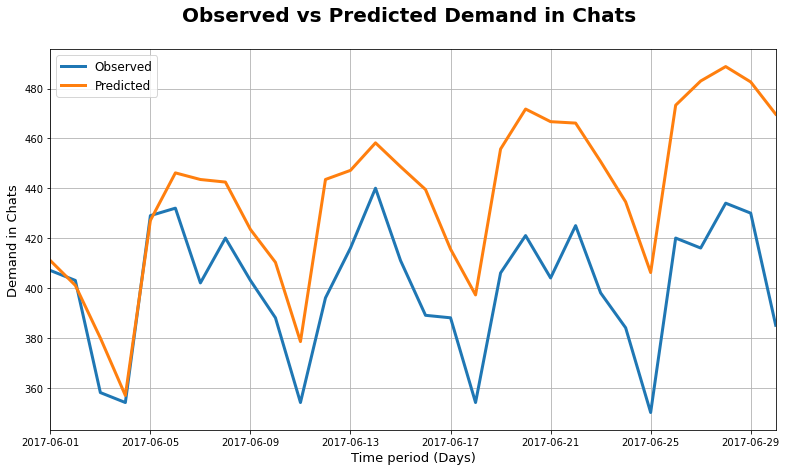

In [844]:
# Plotting the obtained predicted values for June against the real values from the test set:
fig, ax = plt.subplots(figsize = (13, 7))

ax.plot(chats_test.index, chats_test, label = "Observed", lw = 3)
ax.plot(chats_test.index, chats_june_forecast, label = "Predicted", lw = 3)
ax.set_xlim(chats_test.index.min(), chats_test.index.max())

ax.set_xlabel("Time period (Days)", fontsize = 13)
ax.set_ylabel("Demand in Chats", fontsize = 13)
ax.set_title("Observed vs Predicted Demand in Chats \n", fontweight = "bold", fontsize = 20)
ax.legend(loc = "best", fontsize = "large")

ax.grid()

<div style="text-align: justify">We can see from this graph that our model follows a slightly different trend than the observed value. Indeed, while the observed values appear to be stationary, our model predicts values with a positive trend. There is a valid explanation for this discrepancy. As seen in the exploratory phase, the demand for chats remains stationary (i.e. with no downward or upward trend) between mid-May and end of June. Our model was fed data from January-01 to May-31, during which a global positive trend is observed, meaning that our training model is seeing majoritarily this positive trend and thus predicts the new values accordingly. However, the seasonality seems well captured and consistant with our observed data. </div>

## Forecasting the Demand in Chats for July 2017

With our model created and the best values for the orders determined, we can now make our forecast for the demand in chats for the month of July.

In [756]:
# We create the forecast for the month of July using data up to June
model_july = SARIMAX(chats, 
                     order = (2, 1, 0), 
                     seasonal_order = (2, 1, 2, 7), 
                     trend = "c")

In [628]:
result = model_july.fit()

In [757]:
forecast_object = result.get_forecast(steps = 31) # 31 steps for the number of days in July

In [766]:
# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

Here are the predicted values obtained: 

In [768]:
print("Predicted values for the demand in chats (July 2017)")
mean

Predicted values for the demand in chats (July 2017)


2017-07-01    377.858273
2017-07-02    357.618565
2017-07-03    404.899821
2017-07-04    423.496286
2017-07-05    425.747249
2017-07-06    414.036656
2017-07-07    402.772529
2017-07-08    383.742931
2017-07-09    356.681827
2017-07-10    419.188386
2017-07-11    427.713121
2017-07-12    420.527276
2017-07-13    425.694386
2017-07-14    407.209556
2017-07-15    388.568364
2017-07-16    361.012651
2017-07-17    420.584712
2017-07-18    429.057675
2017-07-19    436.622241
2017-07-20    428.678676
2017-07-21    403.889385
2017-07-22    389.274856
2017-07-23    364.815987
2017-07-24    421.195262
2017-07-25    433.505500
2017-07-26    430.216879
2017-07-27    428.389153
2017-07-28    412.455980
2017-07-29    393.632443
2017-07-30    366.217555
2017-07-31    426.741408
Freq: D, Name: predicted_mean, dtype: float64

We can now plot the forecasted data for July against the historical values of January to May 2017: 

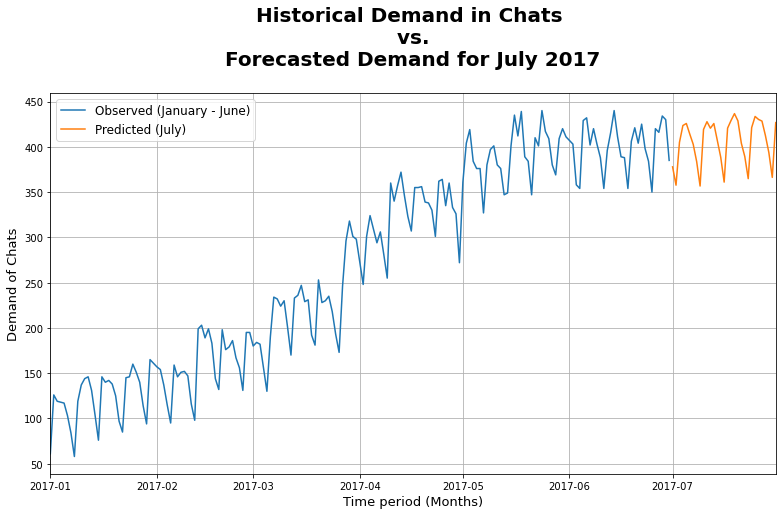

In [845]:
# Plotting the actual and predicted values
fig, ax = plt.subplots(figsize = (13, 7))

ax.plot(chats.index, chats, label = "Observed (January - June)")
ax.plot(dates, mean, label = "Predicted (July)")
ax.set_xlim(chats_demand.index.min(), chats_demand.index.max())

ax.set_xlabel("Time period (Months)", fontsize = 13)
ax.set_ylabel("Demand of Chats", fontsize = 13)
ax.set_title("Historical Demand in Chats \n vs. \n Forecasted Demand for July 2017 \n", 
             fontweight = "bold", fontsize = 20)

ax.legend(fontsize = "large")

ax.grid()

As a final step for our forecasting, we need to translate this demand for chats to a number of nurses that is required to respnd to the demand. To answer this question, we need to establish 2 things: <b> a) </b>How many hours a day a nurse typically works in Canada  <b> b) </b> How long does a consultation lasts.

To answer the first question, on average, nurses can work <b>40h a week </b> (source: The Canadian Nurses Association at https://www.cna-aiic.ca/-/media/cna/page-content/pdf-en/rs_long_working_hours_e.pdf?la=en&hash=093CE19ACD7254A0D07375987EF9FA60CA8CAA3E#:~:text=RNs%20worked%2C%20on%20average%2055,than%2040%20hours%20a%20week.&text=All%20RNs%20worked%20at%20least,more%20times%20during%20that%20period..) This obviously is not counting the very frequent and long periods of overtime nurses do, but this number can be considered as a basis for our analysis.

For the second part, a study published in 2003 titled "<i>The effect of telemedicine on consultation time</i>" (source: https://pubmed.ncbi.nlm.nih.gov/12952731/#:~:text=Nineteen%20patients%20participated%20in%20vascular,and%20negotiation%20of%20its%20management.) demonstrated that the average consultation duration in telemedicine lasted on average 10 min. However, lots have changed since then and since this study was made on a small sample, we can make our own assumption and place this number at 15 min.  

From this, we can calculate the number of nurses that are required in order to keep the virtual clinic well staffed. This will be a new column in a dataframe that contains the predicted demand of chats and the associated number of nurses required for staffing the clinic appropriately.

In [786]:
# First, we create a new data frame
clinic_staffing = pd.DataFrame(mean)
clinic_staffing.head()

,predicted_mean
2017-07-01,377.858273
2017-07-02,357.618565
2017-07-03,404.899821
2017-07-04,423.496286
2017-07-05,425.747249


In [774]:
# We create the important variables
hours_per_day = 8 # We assume that each nurse works 8h a day, following a 5 days/week schedule.
number_consultations_day = hours_per_day/0.25 # (15 min = 0.25h) This is somehow an oversimplification as it does not take
                                              # into account breaks, etc. but gives us an approximation we can work with

In [775]:
# Sanity check
number_consultations_day

32.0

In [818]:
# We then create a new column that translates the demand of chats to nursing staff
clinic_staffing["Nursing Staff"] = (clinic_staffing["predicted_mean"] / number_consultations_day).apply(np.ceil).astype(int)
clinic_staffing.head()

,predicted_mean,Nursing Staff
2017-07-01,377.858273,12
2017-07-02,357.618565,12
2017-07-03,404.899821,13
2017-07-04,423.496286,14
2017-07-05,425.747249,14


Hence, here is the complete serie for the number of nurses required per day for the month of July:

In [819]:
clinic_staffing["Nursing Staff"]

2017-07-01    12
2017-07-02    12
2017-07-03    13
2017-07-04    14
2017-07-05    14
2017-07-06    13
2017-07-07    13
2017-07-08    12
2017-07-09    12
2017-07-10    14
2017-07-11    14
2017-07-12    14
2017-07-13    14
2017-07-14    13
2017-07-15    13
2017-07-16    12
2017-07-17    14
2017-07-18    14
2017-07-19    14
2017-07-20    14
2017-07-21    13
2017-07-22    13
2017-07-23    12
2017-07-24    14
2017-07-25    14
2017-07-26    14
2017-07-27    14
2017-07-28    13
2017-07-29    13
2017-07-30    12
2017-07-31    14
Freq: D, Name: Nursing Staff, dtype: int32

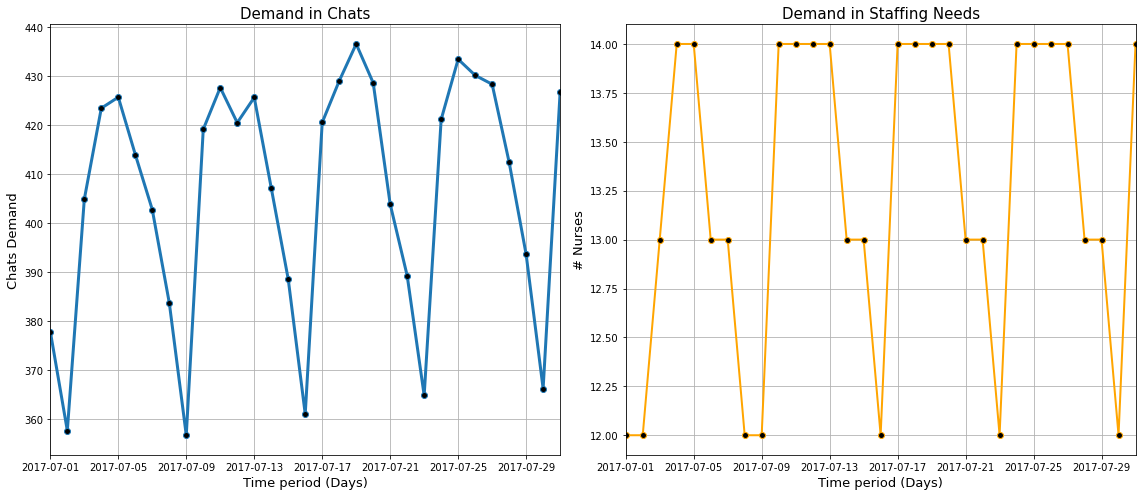

In [837]:
# We can plot the number this dataset to see the trends in staffing needs:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 7))

ax1.plot(clinic_staffing["predicted_mean"], lw = 3, label = "Predicted Chats Demand", 
         marker = "o", markerfacecolor = "black")
ax1.set_xlabel("Time period (Days)", fontsize = 13)
ax1.set_ylabel("Chats Demand", fontsize = 13)
ax1.set_xlim(clinic_staffing.index.min(), clinic_staffing.index.max())
ax1.set_title("Demand in Chats", fontsize = 15)
ax1.grid()

ax2.plot(clinic_staffing["Nursing Staff"], lw = 2, label = "Nursing Staff", 
         color = "orange", marker = "o", markerfacecolor = "black")
ax2.set_xlabel("Time period (Days)", fontsize = 13)
ax2.set_ylabel("# Nurses", fontsize = 13)
ax2.set_title("Demand in Staffing Needs", fontsize = 15)
ax2.set_xlim(clinic_staffing.index.min(), clinic_staffing.index.max())
ax2.grid()

plt.tight_layout()

## Questions

#### A) How would you evaluate the accuracy of your model?

The model accuracy would be measured using the Root Mean-Squared Error, which is calculated as such:

RMSE = $\sqrt{mean((e^2)_t)}$

Another common way of measuring how accurate our model is against real values is tme Mean Absolute Error, which tends also to be interpreted in an easier way than the RMSE: 

MAE = $mean(\lvert e_t \rvert)$

These 2 methods would allow us to measure how far the forecasted data of our model is from true observed data.

#### B) If the team starts using this model to staff the clinic, how would you evaluate the impact of this change on Dialogue's operations?

<div style="text-align: justify">If this model was used in order to staff the clinic, it's impact on Dialogue's operations would be evaluated by comparing the average user waiting period to access a nurse for a consultation on a weekly basis (i.e., each week, how long on average do users wait to consult with a nurse?) compared to historical data on waiting time. Indeed, this forecast model allows us to prepare in advance the nursing staff to ensure every chat demand is fulfilled. By looking at historical data regarding the waiting period each user has to face on average before accessing a nurse, we can calculate by how much the weekly average waiting time has droped.</div>

#### C) What are the next steps to improve the model’s accuracy and its impact on costs and quality of service?

<div style="text-align: justify">In order to improve the accuracy, we can switch from the SARIMA model that was used to a SARIMAX model, or Exogeneous SARIMA. This model takes also into accounts other independent variables, which in our case would be the number of eligible users. But if we want to improve our actual model, one way to improve its accuracy is to simply update it on a regular basis using newly acquired data (e.g. feed into it the chats demand for each month after the model was created. In this case we would give the model data from July 2017, August, September, etc. as they come in, to make sure our model stays updated on new trends or seasonal pattern that could emerge in the future). To do such operation, we can use the joblib package which allows us to update easily our model using new dataframes / Series. As the model gets updated and becomes more accurate, this will in turn translate into an impact on costs. In fact, we can determine the reduction in overtime costs whenever the clinic was understaffed, or, in the opposite direction, how much the costs of having idle nurses have been reduced when the clinic is overstaffed, between historical data (i.e. before the first forecast) and forecasted data regarding overtime costs. As for the quality of service, we can once again measure the decrease in waiting time experienced by eligible users who seek a consultation with a nurse, between historical data and waiting time observed due to our forecast model.</div>